# Unsupervised Learning

## Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Importing data set

In [2]:
flower = sns.load_dataset('iris')
print(flower.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Remove the Target Feature, we will deal with Descriptive features only.

In [3]:
descriptive_features = flower.iloc[:,:-1].values
descriptive_features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Finding the optimum number of clusters for k-means classification

The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion. Inertia can be recognized as a measure of how internally coherent clusters are. This is what the KMeans tries to minimize with each iteration.

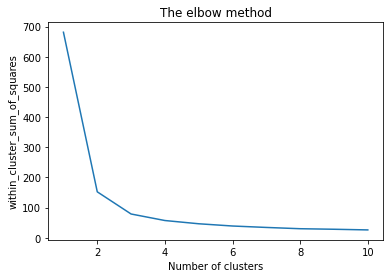

In [4]:
#  Elbow Method for finding k means 
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 11):   # k means++ is type k means metheds (it optimized methode for k means)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(descriptive_features)       #fitting 
    within_cluster_sum_of_squares.append(kmeans.inertia_)   # n_init setting like randum forest and it retain best results 
                                                            # k- mean inertia (trys to retain the change in values )
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()


## Apply K-means Clustering

In [5]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_prediction = kmeans.fit_predict(descriptive_features)

In [6]:
y_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Visualizing the Clusters

### Plotting on the basis of Sepal Features

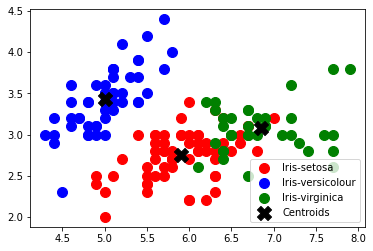

In [7]:
#Visualising the clusters
plt.scatter(descriptive_features[y_prediction == 0, 0], descriptive_features[y_prediction == 0, 1], s = 100, c = 'red', label = 'Iris-setosa') # s = size of dot , 
plt.scatter(descriptive_features[y_prediction == 1, 0], descriptive_features[y_prediction == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour') # lable are the Iris_vericolour 
plt.scatter(descriptive_features[y_prediction == 2, 0], descriptive_features[y_prediction == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], marker='X', s = 200, c = 'black', label = 'Centroids')

plt.legend()

In [8]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

kmeans.inertia_

In [10]:
kmeans.n_clusters

3

### Plotting on the basis of Petal Features

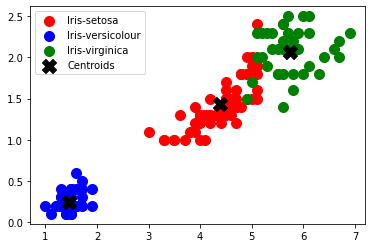

In [7]:
#Visualising the clusters
plt.scatter(descriptive_features[y_prediction == 0, 2], descriptive_features[y_prediction == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(descriptive_features[y_prediction == 1, 2], descriptive_features[y_prediction == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(descriptive_features[y_prediction == 2, 2], descriptive_features[y_prediction == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], marker='X', s = 200, c = 'black', label = 'Centroids')

plt.legend()

## Match Accuracy with Known Labels i.e Species in Iris Dataset

In [8]:
target_feature = flower.iloc[:,-1:]
target_feature

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


## Changing categorical data into Numeric Data

In [9]:
target_feature = target_feature.replace('setosa',1)
target_feature = target_feature.replace('versicolor',0)
target_feature = target_feature.replace('virginica',2)

target_feature


,species
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,2
147,2
148,2


## Measuring Accuracy

In [10]:
# Measuring score
from sklearn.metrics import accuracy_score
score = accuracy_score(target_feature,y_prediction)
print('Accuracy Score of K-means Classification is:', score)

Accuracy Score of K-means Classification is: 0.8933333333333333


## Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_feature,y_prediction)
cm

array([[48,  0,  2],
       [ 0, 50,  0],
       [14,  0, 36]], dtype=int64)

Text(0.5, 1.0, 'Accuracy score : 0.8933333333333333')

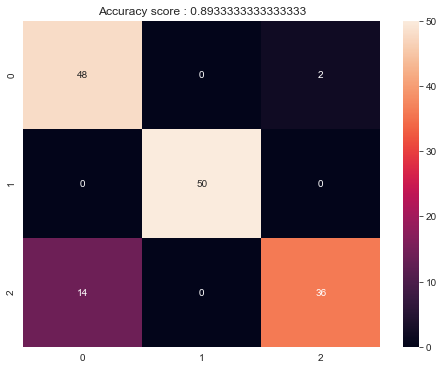

In [12]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True,)
plt.ylabel = 'Actual Output'
plt.xlabel = 'Predicted Output'
cm_title = 'Accuracy score : {0}'.format(score)
plt.title(cm_title)

## K mediods

Issue with k-means 

k-mean depand on oulies 

centeroid of average of culster while its not the part of cluster 

k-medoids (clusteroid will be the piont of cluster)

other method is hirrarchical method in which is there is no need to tell about cluster it will automaticlly tell the number of clusters (no need of k in this method)

density of based clustering

diamensions are culums 

DB scan find the cluster in any shape with is used to find the cluster in high  dimensional data 

In [14]:
pip install scikit-learn-extra # for k-mediods 

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Hisham' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
#Applying kmeans to the dataset / Creating the kmeans classifier
from sklearn_extra.cluster import KMedoids  # heroestic is besically used for Ai its only guess
k_medions = KMedoids(n_clusters=3, metric='euclidean', method='alternate', init='heuristic', max_iter=600, random_state=False)
y_prediction = k_medions.fit_predict(descriptive_features)

In [16]:
y_prediction

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Visualizing the Clusters

### Sepal Features

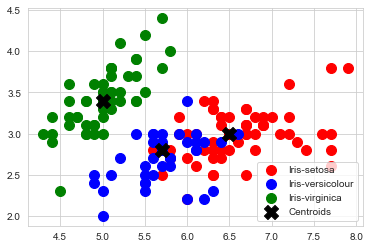

In [17]:
#Visualising the clusters
plt.scatter(descriptive_features[y_prediction == 0, 0], descriptive_features[y_prediction == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(descriptive_features[y_prediction == 1, 0], descriptive_features[y_prediction == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(descriptive_features[y_prediction == 2, 0], descriptive_features[y_prediction == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(k_medions.cluster_centers_[:, 0], k_medions.cluster_centers_[:,1], marker='X', s = 200, c = 'black', label = 'Centroids')

plt.legend()

### Plotting on the basis of Petal Features

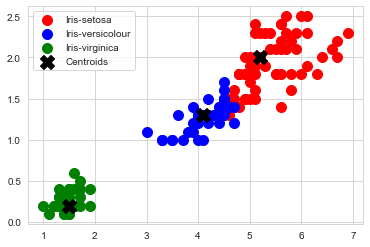

In [18]:
#Visualising the clusters
plt.scatter(descriptive_features[y_prediction == 0, 2], descriptive_features[y_prediction == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(descriptive_features[y_prediction == 1, 2], descriptive_features[y_prediction == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(descriptive_features[y_prediction == 2, 2], descriptive_features[y_prediction == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(k_medions.cluster_centers_[:, 2], k_medions.cluster_centers_[:,3], marker='X', s = 200, c = 'black', label = 'Centroids')


plt.legend()

## Match Accuracy with Known Labels i.e Species in Iris Dataset

In [19]:
target_feature = flower.iloc[:,-1:]
target_feature

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


## Changing categorical data into Numeric Data

In [20]:
target_feature = target_feature.replace('setosa',2)
target_feature = target_feature.replace('virginica',0)
target_feature = target_feature.replace('versicolor',1)
target_feature


,species
0,2
1,2
2,2
3,2
4,2
...,...
145,0
146,0
147,0
148,0


In [ ]:
# Measuring score
from sklearn.metrics import accuracy_score
score = accuracy_score(target_feature,y_prediction)
print('Accuracy Score of K-medoids Clustering is:', score)

## Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_feature,y_prediction)
cm

array([[49,  1,  0],
       [13, 37,  0],
       [ 0,  0, 50]], dtype=int64)

Text(0.5, 1.0, 'Accuracy score : 0.8933333333333333')

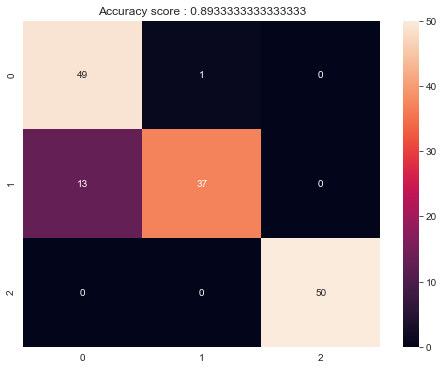

In [22]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True,)
plt.ylabel = 'Actual Output'
plt.xlabel = 'Predicted Output'
cm_title = 'Accuracy score : {0}'.format(score)
plt.title(cm_title)

## Dendograms

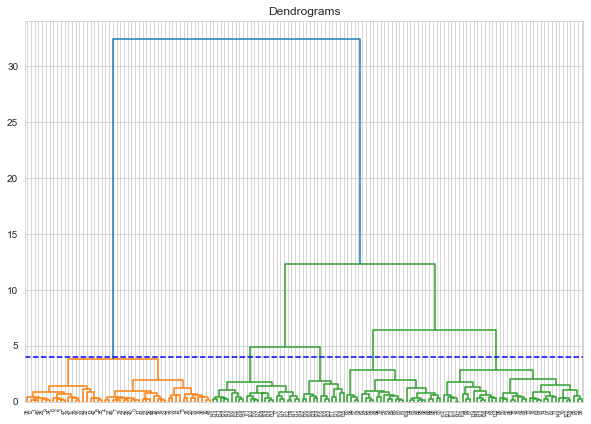

In [40]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(descriptive_features, method='ward'))
plt.axhline(y=4, color='b', linestyle='--')

## Aglomerative Clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_prediction=cluster.fit_predict(descriptive_features)
y_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

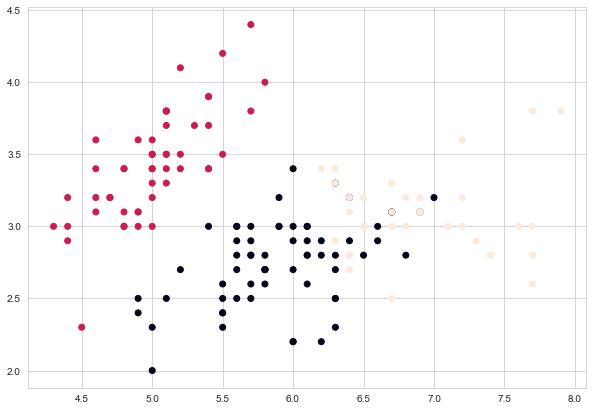

In [25]:
plt.figure(figsize=(10, 7))
plt.scatter(descriptive_features[:,:-3], descriptive_features[:,1:-2], c=cluster.labels_)

plt.show()

## Getting Target Feature

In [26]:
target_feature = flower.iloc[:,-1:]
target_feature

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


## Changing categorical data into Numeric Data

In [27]:
target_feature = target_feature.replace('setosa',1)
target_feature = target_feature.replace('virginica',2)
target_feature = target_feature.replace('versicolor',0)
target_feature


,species
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,2
147,2
148,2


In [28]:
# Measuring score
from sklearn.metrics import accuracy_score
score = accuracy_score(target_feature,y_prediction)
print('Accuracy Score of Aglomerative Clustering is:', score)

Accuracy Score of Aglomerative Clustering is: 0.8933333333333333


## Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_feature,y_prediction)
cm

array([[49,  0,  1],
       [ 0, 50,  0],
       [15,  0, 35]], dtype=int64)

In [ ]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True,)
plt.ylabel = 'Actual Output'
plt.xlabel = 'Predicted Output'
cm_title = 'Accuracy score : {0}'.format(score)
plt.title(cm_title)

## DB (Density-Based) SCAN with Data Points in Circular pattern 

In [4]:
import math
import matplotlib.pyplot as plt
import matplotlib

### Create Datapoints in a form of Circle

In [5]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [6]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

### Plotting datapoints

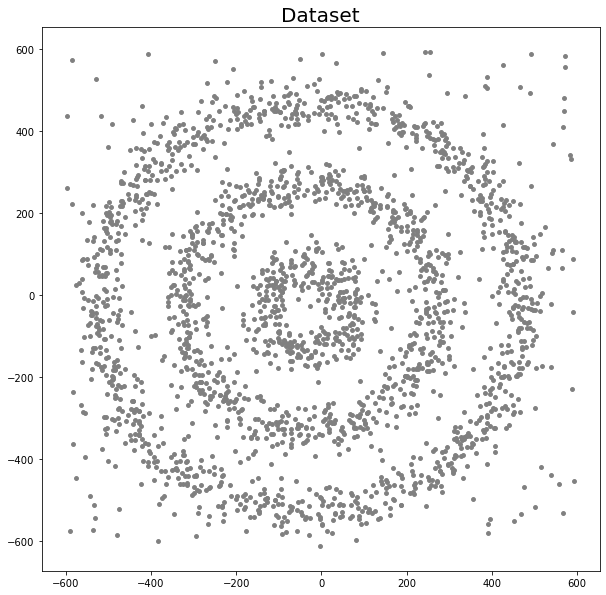

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.ylabel = 'Actual Output'
plt.xlabel = 'Predicted Output'
plt.show()

### Clustering on the basis of K-Means

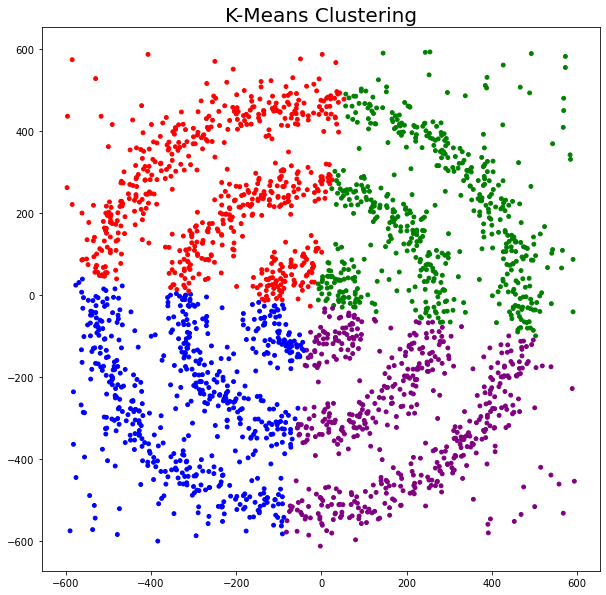

In [8]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.ylabel = 'Actual Output'
plt.xlabel = 'Predicted Output'
plt.show()

### Clustering Based on Aglomerative Clustering

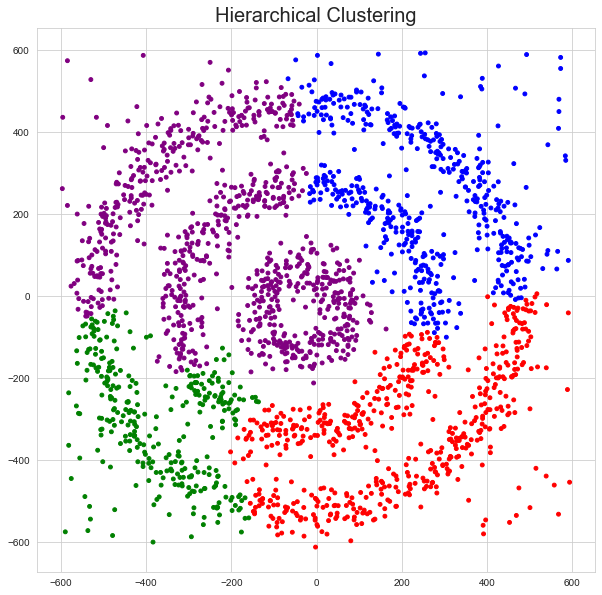

In [35]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])
df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.show()

### DB Scan method

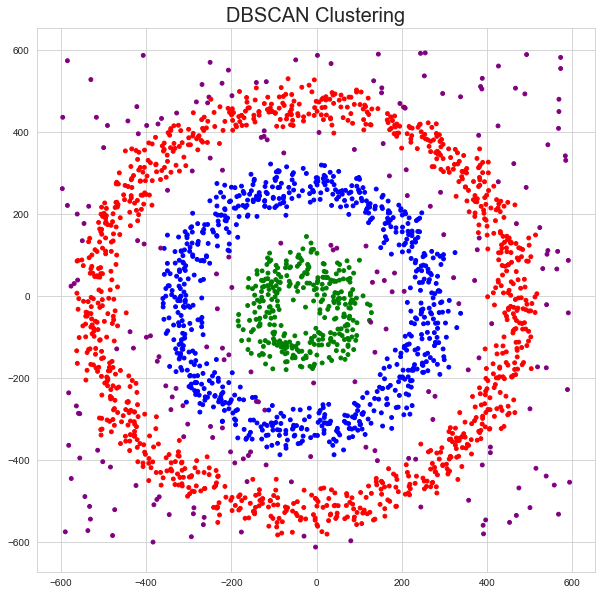

In [36]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.show()

# Neural Networks